<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_9_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective: Constructing linear and polynomial regression models and analysing the performance of these models.**

1. Load Boston housing data from sklearn (sklearn.datasets.load_boston). Dataset 
description https://www.kaggle.com/prasadperera/the-boston-housing-dataset

2. Do the exploratory analysis of the dataset (i.e. univariate and multivariate analysis) 
and plot the graphs 
3. Remove any undesirable feature from the dataset and scale the remaining features.
4. Split the dataset into train and test. 
5. Write a function that fits a polynomial LinearRegression model on the training subset
for degrees 1, 3 and 6
6. Compare the performance of various models based on the coefficient of determinant 
(R2
) and RMSE.
7. Based on the above scores from step 6 (degree levels 1 through 6), what degree level 
corresponds to a model that is underfitting? What degree level corresponds to a 
model that is overfitting? What choice of degree level would provide a model with 
good generalization performance on this dataset? This function should return one 
tuple with the degree values in this order: “(Underfitting, Overfitting, 
Good_Generalization)”
Note: There may be multiple correct solutions to this question.
8. Training models on high degree polynomial features can result in overly complex 
models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.


## **(1) Load Boston housing data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.datasets import load_boston

boston_dataset = load_boston()

df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


## **(2) Exploratory Data Analysis using Plots**

In [ ]:
df.describe()  # univariate and multivariate analysis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
columns = boston_dataset.feature_names
print(columns)
print(df.isnull().sum())

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


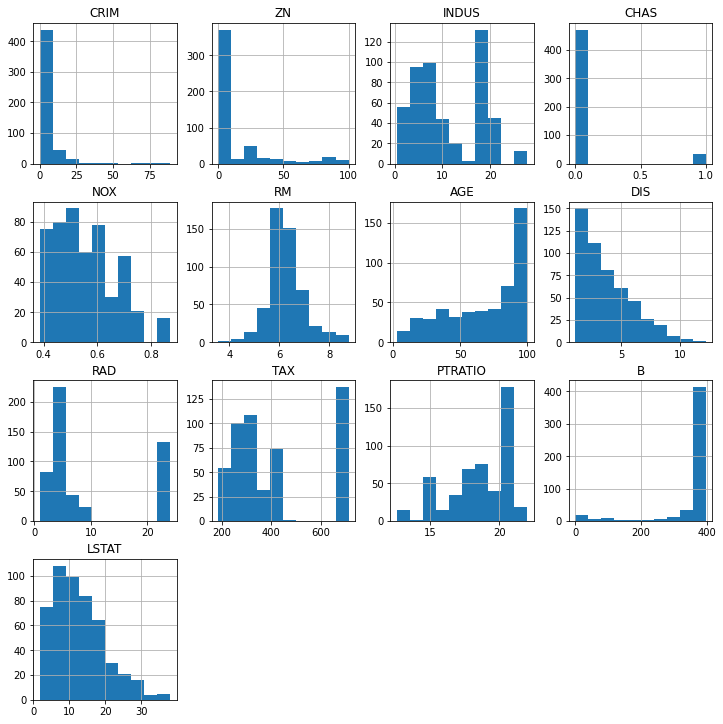

In [ ]:
df.hist(figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.show()

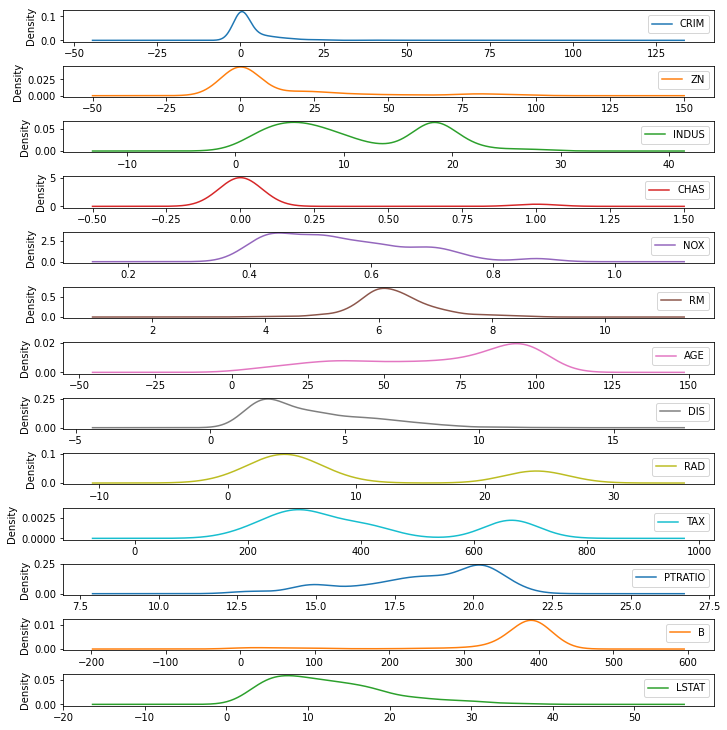

In [ ]:
df.plot(kind = 'density',subplots=True,sharex = False,figsize = (10,10))
plt.tight_layout(pad=0.3)
plt.show()

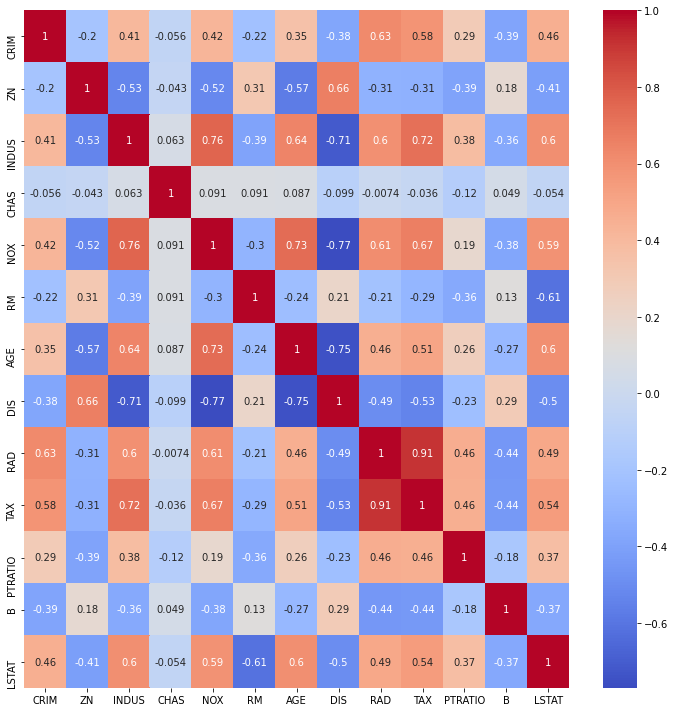

In [ ]:
corr = df.corr()           # closer to 1 more is the co-relation 
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap = "coolwarm")
plt.tight_layout()
plt.show()

# **(3) Remove any undesirable feature from the dataset and scale the remaining features.**

## RAD, TAX have a correlation of 0.91 and DIS and AGE which have a correlation of -0.75.
# Drop RAD,DIS (due to high and low corr)

In [ ]:
df2 = df.drop(['RAD','DIS'],axis=1)
df2.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,242.0,17.8,396.9,9.14


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_feature= sc.fit_transform(df2)

In [ ]:
Y_target = boston_dataset['target']
Y_target.shape

(506,)

#  **(4) Split the dataset into train and test.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 11)
(102, 11)
(404,)
(102,)


# **(5) Write a function that fits a polynomial LinearRegression model on the training subset for degrees 1, 3 and 6**

In [ ]:
from sklearn.linear_model import LinearRegression 

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = lin_model.predict(X_train)     # to check for overfitting (error in training is low, testing is high)
y_test_predict = lin_model.predict(X_test) 

# **(6) Compare the performance of various models based on the coefficient of determinant (R2) and RMSE**

In [ ]:
from sklearn.metrics import r2_score           # r2 score closer to or equal to 1 , model is performing good (how good model has fitted the regression line/model)
from sklearn.metrics import mean_squared_error

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))  
r2 = r2_score(Y_train, y_train_predict)


# model evaluation for training set

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.138109497353755
R2 score is 0.7116929580916103


The model performance for testing set
--------------------------------------
RMSE is 4.902535371577874
R2 score is 0.5703568361513567


## **POLYNOMIAL REGRESSION**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def modeltraining():
  status = {}
  for degree in range(1,7):
    poly = PolynomialFeatures(degree)

    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    
    lin2 = LinearRegression()
    lin2.fit(X_poly, Y_train)
    y_pred = lin2.predict(X_poly)
    y_test = lin2.predict(X_poly_test)

    rmse_tr = (np.sqrt(mean_squared_error(y_pred, Y_train)))  
    rmse = (np.sqrt(mean_squared_error(y_test, Y_test)))  
    r2_tr = r2_score(y_pred, Y_train)
    r2 = r2_score(y_test, Y_test)

    print('-----'*10)
    print("For Degree = {}".format(degree))
    print("")
    print("RMSE for Training: ",rmse_tr)
    print("RMSE for Testing: ",rmse)
    print("R2 for Training: ",r2_tr)
    print("R2 for Testing: ",r2)

    modelstatus(degree,rmse_tr,rmse,r2_tr,r2,5,status)
  return status

In [ ]:
def modelstatus(degree,rmse_tr,rmse,r2_tr,r2,th,status):
  threshold=th
  if (abs(rmse_tr-rmse) < threshold and abs(rmse_tr-rmse) > 2):
    status[degree] = "Proper Fitting"
  elif (abs(rmse_tr-rmse) > threshold+10):
    status[degree] = "Over Fitting"
  else:
    status[degree] = "Under Fitting"

In [ ]:
modelstats = modeltraining()
print("")
print("")
print("Categorising the data into proper,under and over fitting")
print("-------"*10)
print(modelstats)

--------------------------------------------------
For Degree = 1

RMSE for Training:  5.138109497353755
RMSE for Testing:  4.90253537157787
R2 for Training:  0.5948996844348733
R2 for Testing:  0.51596708862949
--------------------------------------------------
For Degree = 2

RMSE for Training:  2.710971218878725
RMSE for Testing:  4.265485499868736
R2 for Training:  0.9127363832304136
R2 for Testing:  0.7293536660948605
--------------------------------------------------
For Degree = 3

RMSE for Training:  0.898930691711986
RMSE for Testing:  175.3561292637274
R2 for Training:  0.9910967105043944
R2 for Testing:  -0.019274586002969496
--------------------------------------------------
For Degree = 4

RMSE for Training:  6.590587266720948e-13
RMSE for Testing:  28.966352221804026
R2 for Training:  1.0
R2 for Testing:  -0.08542404299447348
--------------------------------------------------
For Degree = 5

RMSE for Training:  1.2674773648774502e-12
RMSE for Testing:  80.94631972549622
R

## **Lasso Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
model = Lasso(alpha=0.01,max_iter=10000)
model.fit(X_train,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_predict))
r2 = r2_score(Y_train, y_predict)
print('RMSE for Lasso Regression Model is {}'.format(rmse))
print('R2 score for Lasso Regression Model is {}'.format(r2))

RMSE for Lasso Regression Model is 5.138403440004441
R2 score for Lasso Regression Model is 0.711659970020712


In [ ]:
y_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_predict))
r2 = r2_score(Y_test, y_predict)
print('RMSE for Lasso Regression Model is {}'.format(rmse))
print('R2 score for Lasso Regression Model is {}'.format(r2))

RMSE for Lasso Regression Model is 4.886858480850068
R2 score for Lasso Regression Model is 0.5731001921419843
